*Mobile ads classification:*

*Importing the required libraries:*

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
kl = pd.read_csv("mobile_ads.csv")

*Basic Checks:*

In [5]:
kl.shape

(400, 5)

In [6]:
kl.head(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


In [6]:
kl.tail(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
kl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


one of the columns had datatype object i.e "discrete columns" and the other are of discrete value "int"

In [8]:
kl.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
kl.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
kl = kl.drop_duplicates() # Drop the dupicated value if any

In [11]:
kl["Purchased"].value_counts().to_frame() #Boolian metrics

,count
Purchased,
0,257
1,143


In [12]:
kl.nunique()   # Cardinality test

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

*Visualizing for better consideration:*

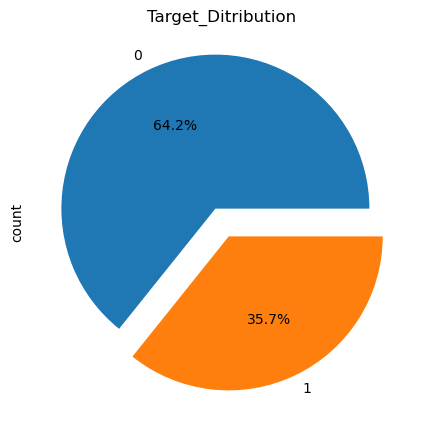

In [13]:
# Pie plot;
plt.figure(figsize=(5,5))
kl["Purchased"].value_counts().plot.pie(explode=[0.1,0.1],autopct="%1.1f%%").set_title("Target_Ditribution")
plt.show()

-  Target is imbalanced accross the population.
-  we can consider to under sample the majority or over sample the minority.
-  The Synthetic Minoriy Over Sampling Technique (SMOTE) to generate synthetic samples for the minority class.

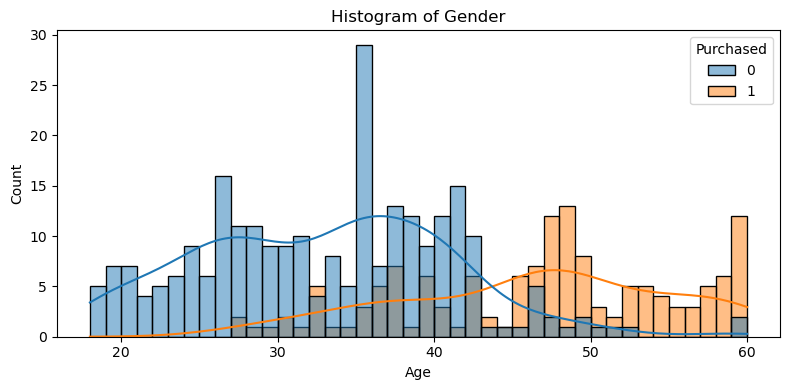

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(data=kl,x="Age",hue="Purchased",binwidth=1,kde=True)
plt.title("Histogram of Gender")
plt.tight_layout()
plt.show()

- Age below 30 were less likely to purchase than not.
- Age more than 45-60 were more likely ot purchase or not

*Insight:*  Can create a features for age range adult,adolescent or teen but not that necessary

<Figure size 800x400 with 0 Axes>

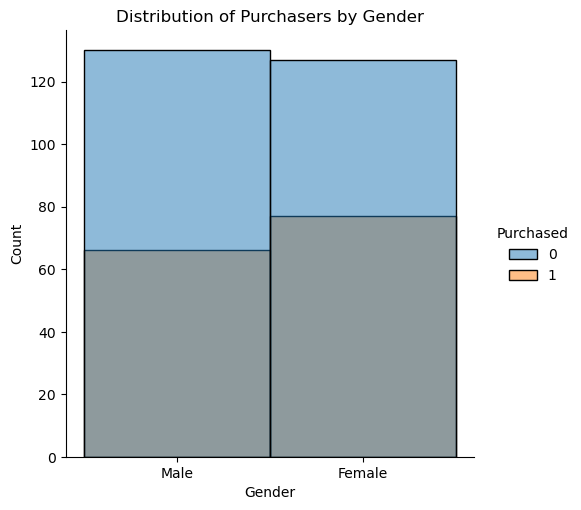

In [15]:
# Gender propotion in purchasing;
plt.figure(figsize=(8,4))
sns.displot(data=kl,x="Gender",hue="Purchased")
plt.title("Distribution of Purchasers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

As seen from the histogram the propotion is very much equally distributed in both of the genders.

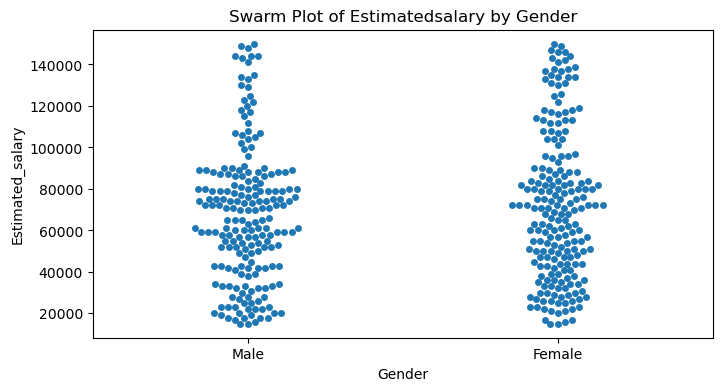

In [16]:
plt.figure(figsize=(8,4))
sns.swarmplot(data=kl,x="Gender",y="EstimatedSalary")
plt.title("Swarm Plot of Estimatedsalary by Gender")
plt.xlabel("Gender")
plt.ylabel("Estimated_salary")
plt.show()

Salary is also equally distributed through out not need to check further

                                             |                                             | [  0%]   00:00 ->…


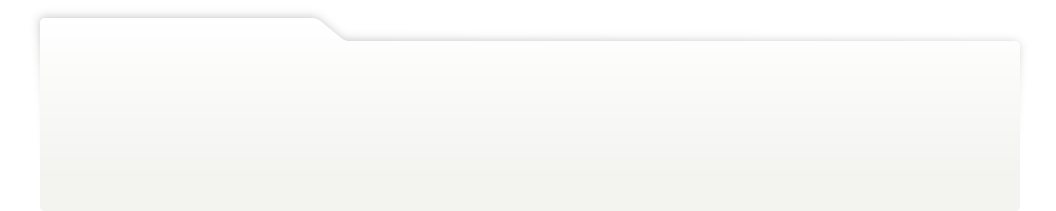
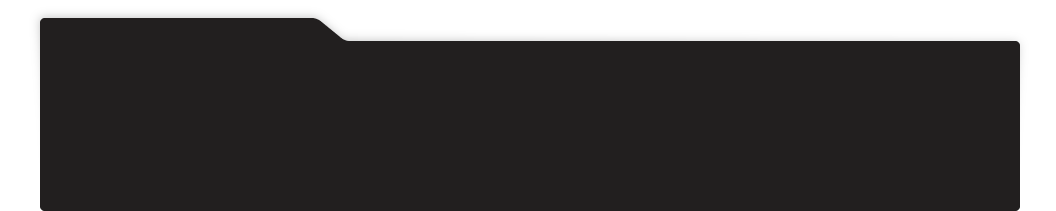
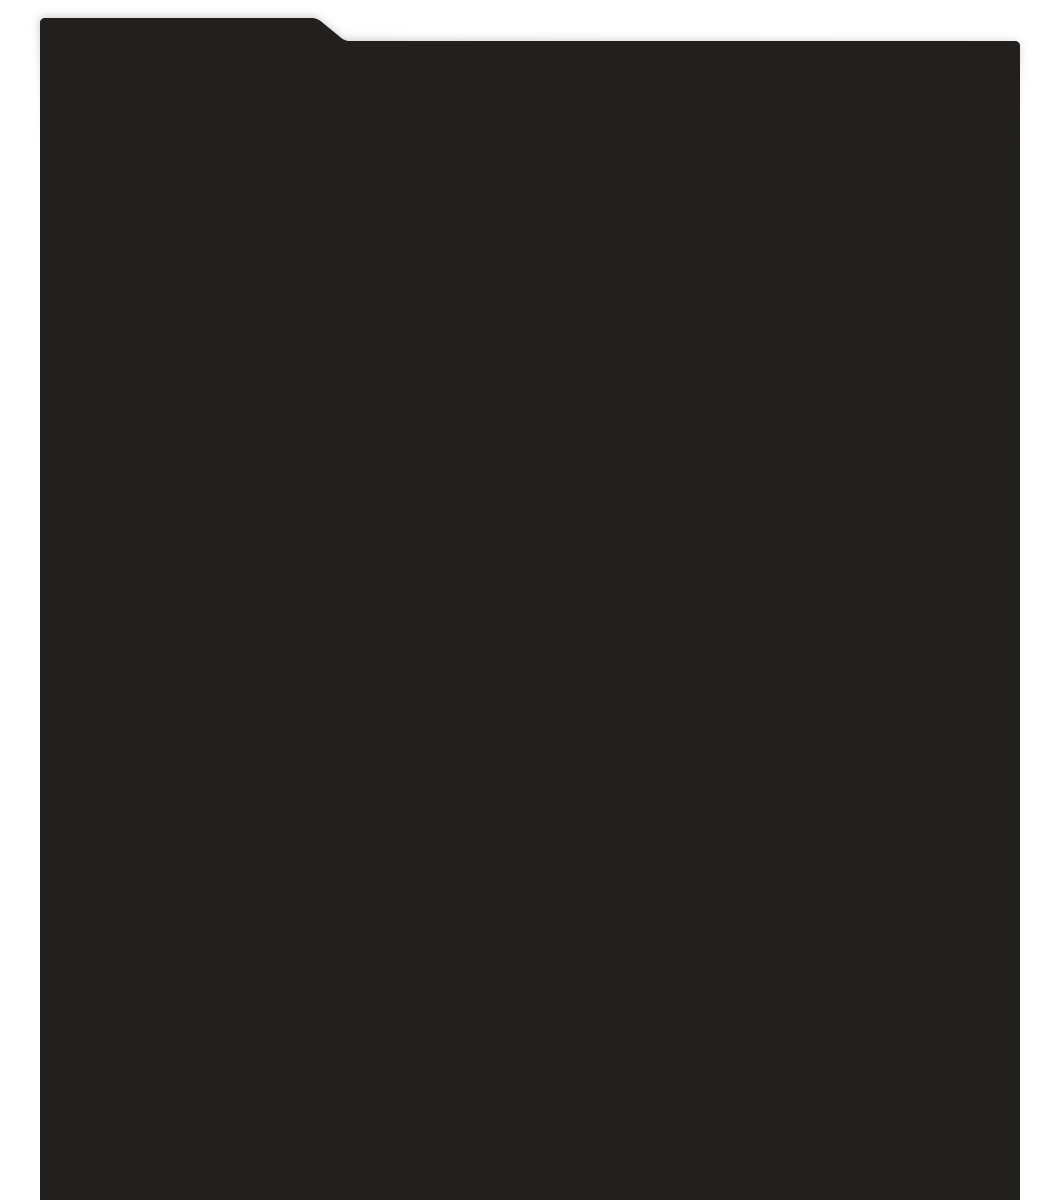
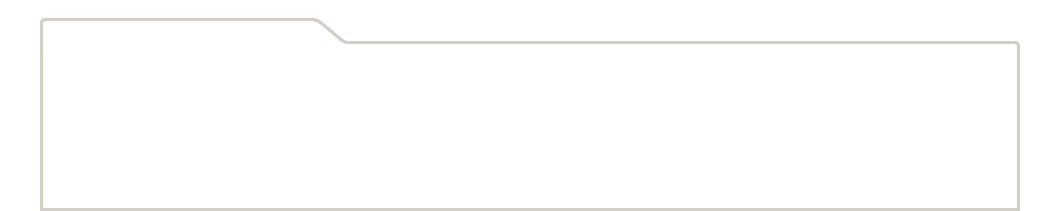
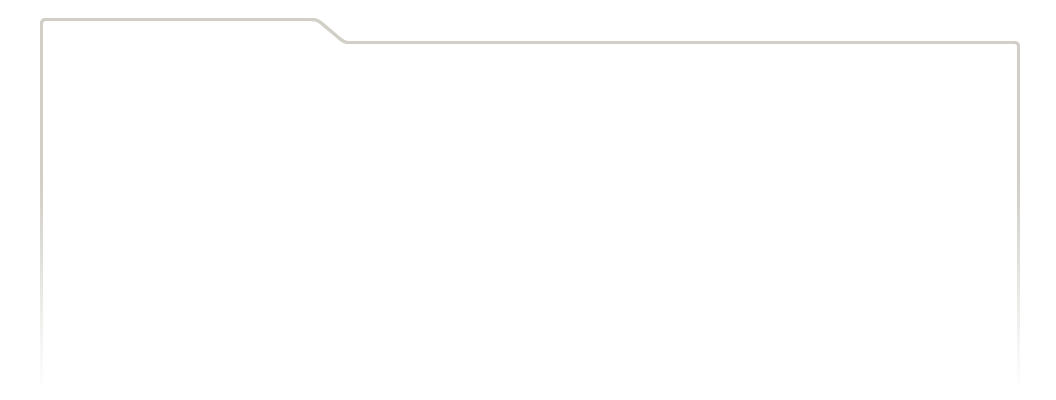
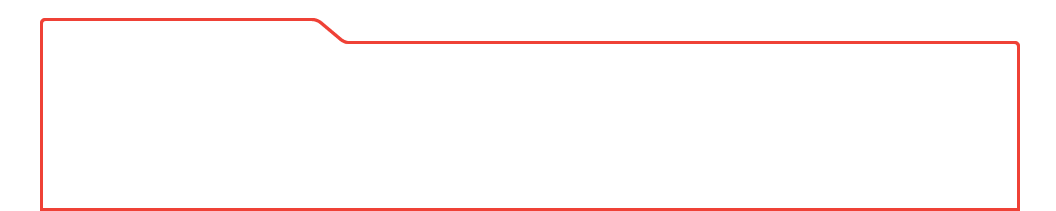
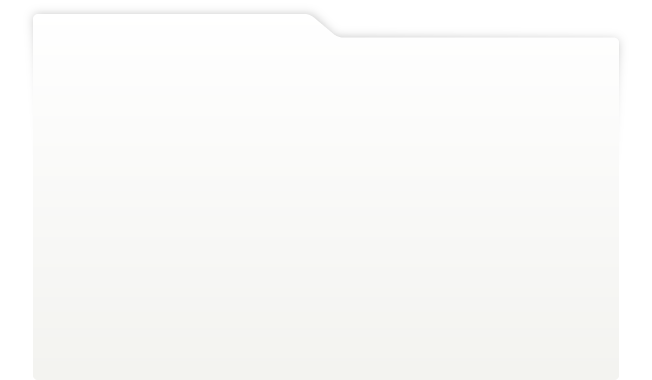
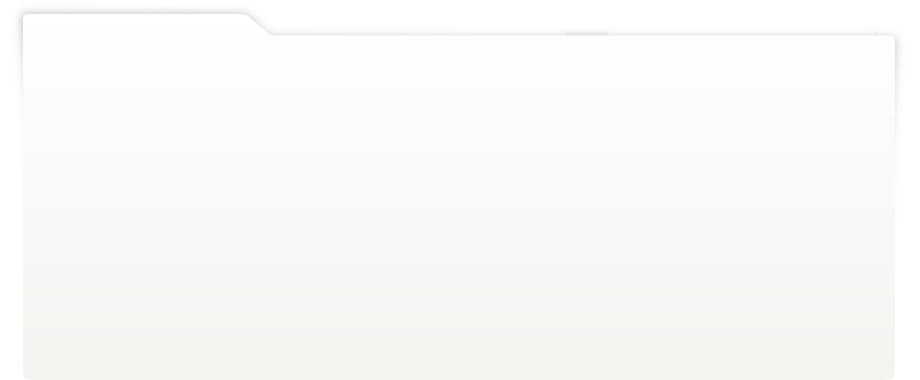
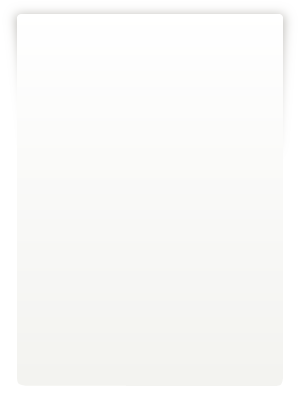
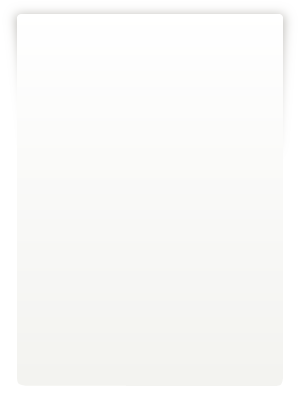
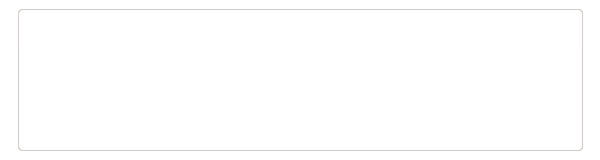
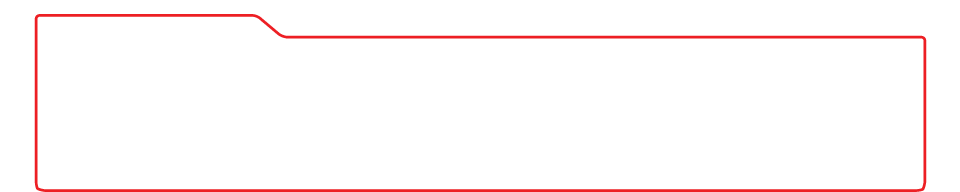
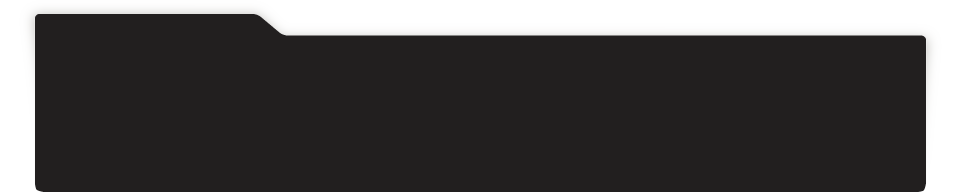
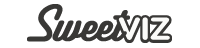
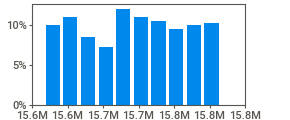
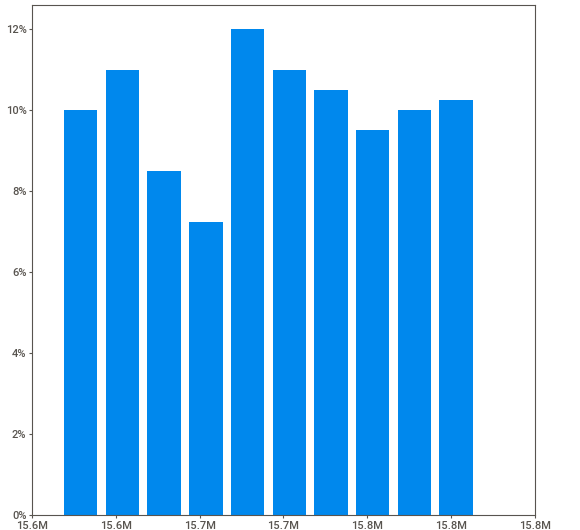
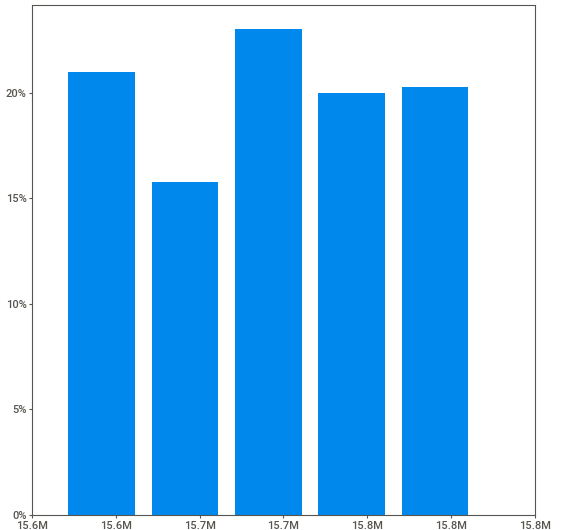
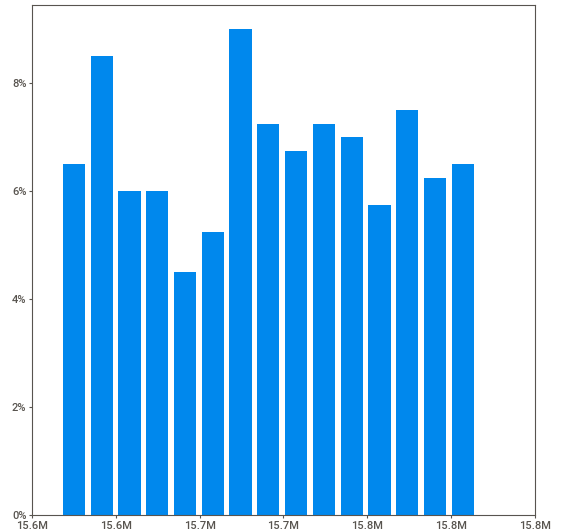
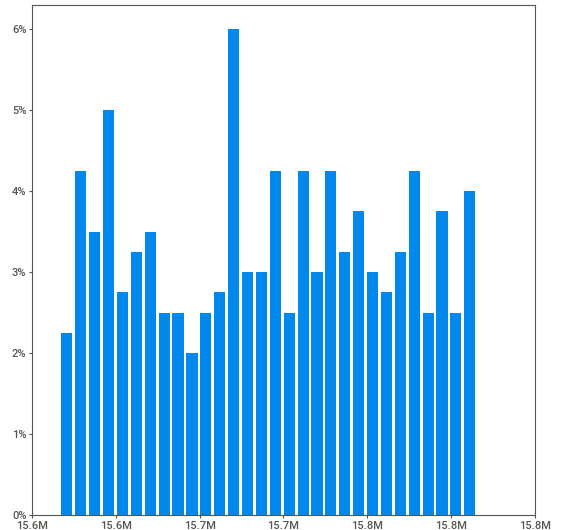
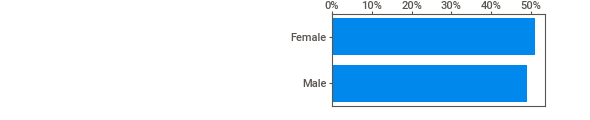
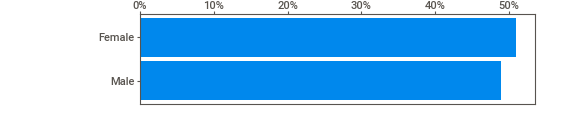
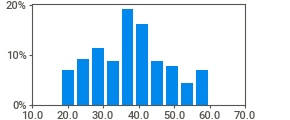
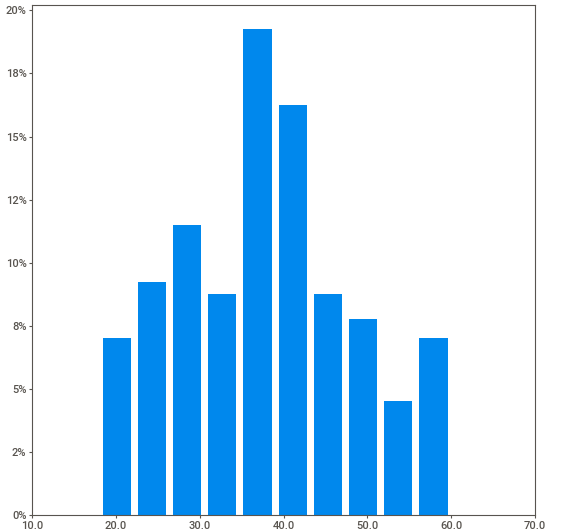
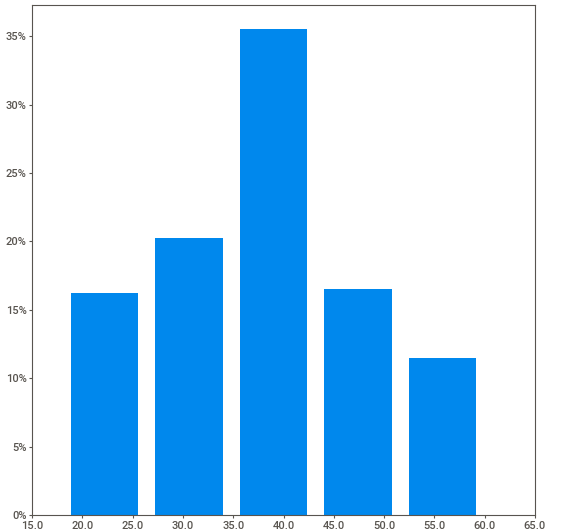
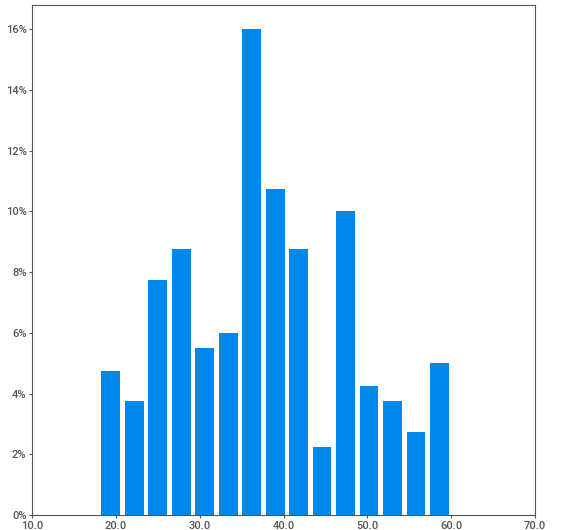
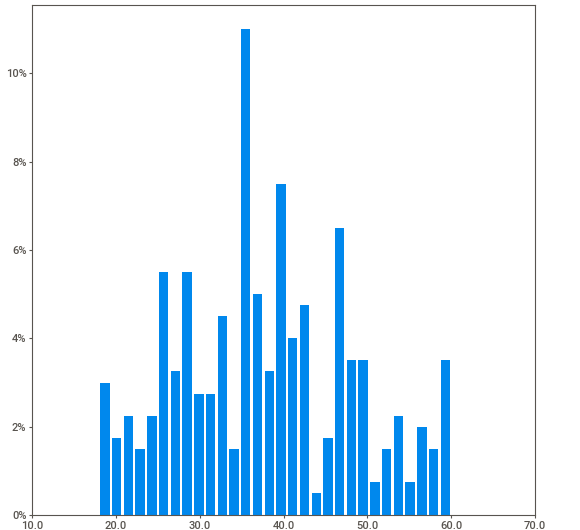
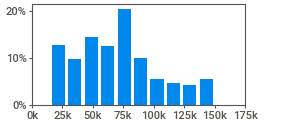
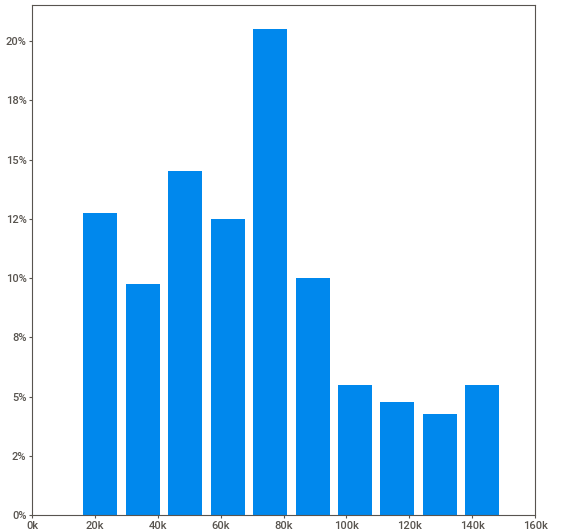
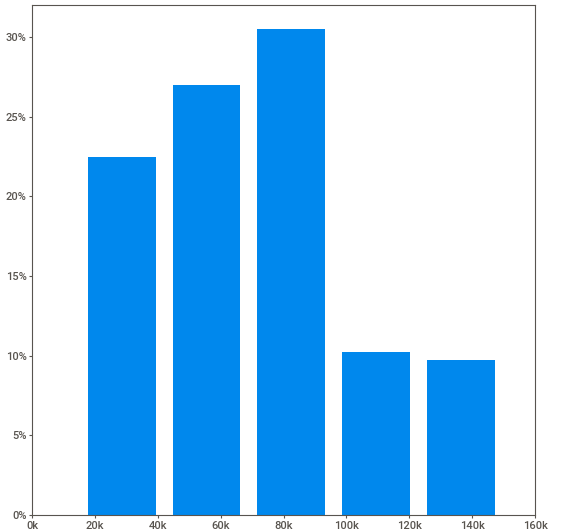
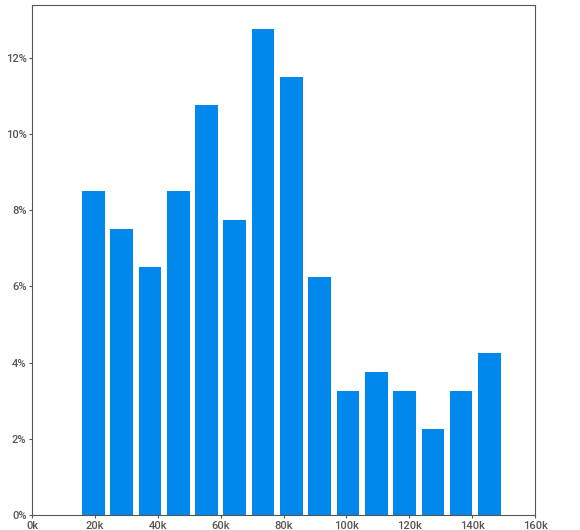
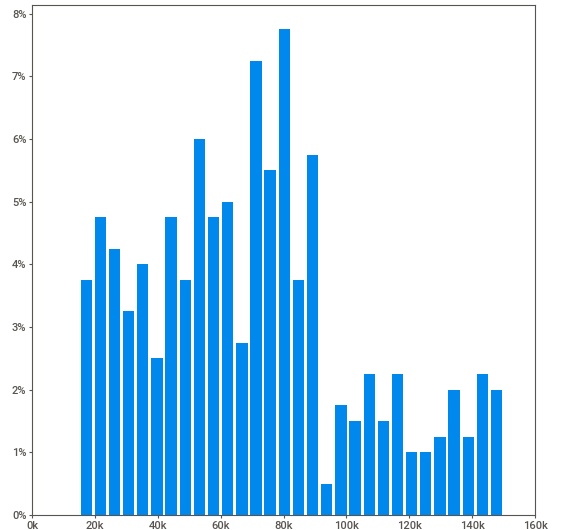
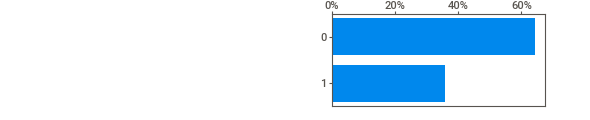
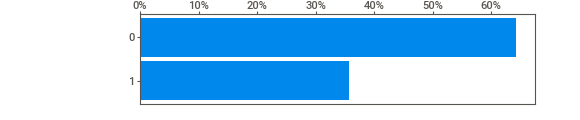
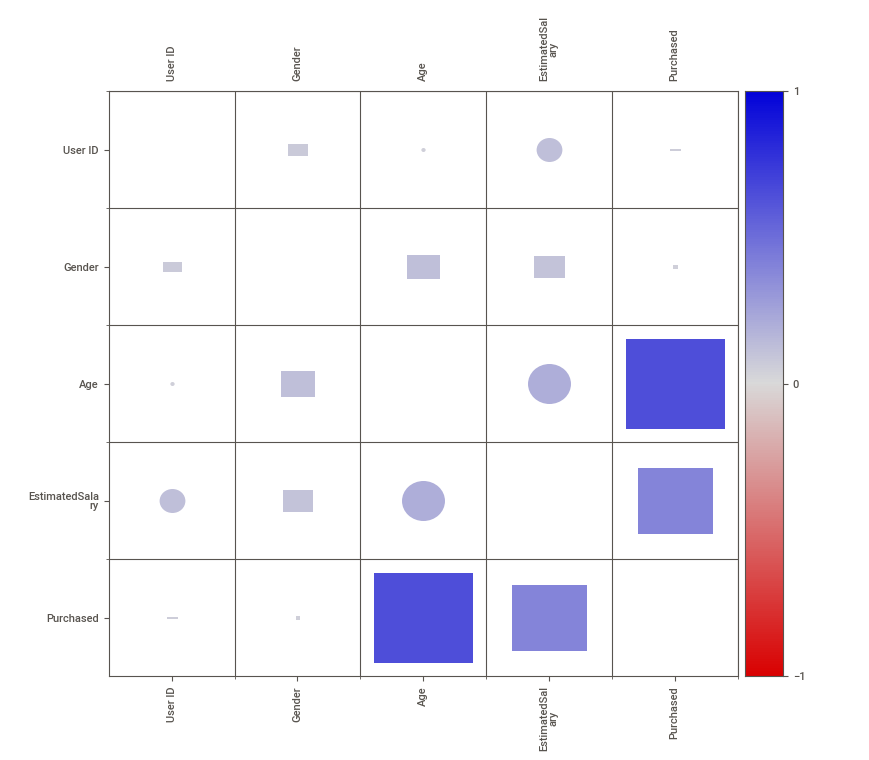
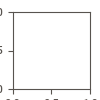

In [17]:
import sweetviz as sv
report = sv.analyze(kl)
report.show_notebook()

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
kl["GenderEncode"] = le.fit_transform(kl["Gender"])

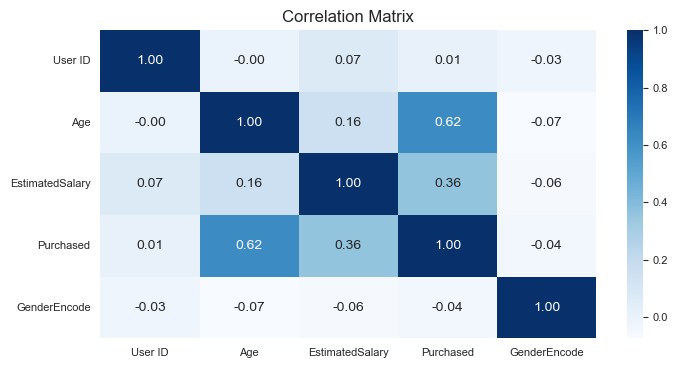

In [19]:
# Assuming the "Gender" is a categorical variable encoded as integers
# If "Gender" is not numerical, use appropriate correlation metrics for categorical data

# Drop the "Gender" column for the correlation matrix;
copy_kl = kl.drop(["Gender"],axis=1)

# Form the correlationns matrix;
corr_mat = copy_kl.corr()

# Plot the heatmap;
plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
sns.heatmap(data=corr_mat,annot=True,cmap="Blues",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Two matrices as can see gives us ass good relation to the purchase.i.e age and estimated salary lets use those and implement the model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [21]:
def nueralnet(x_train,x_test,y_train,y_test):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(3,)),
        tf.keras.layers.Dense(64,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ])
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)
    loss,accuracy = model.evaluate(x_test,y_test)
    print(f"Test Loss:{loss:.4f},Test_Accuracy:{accuracy:.4f}")

In [22]:
from sklearn.metrics import accuracy_score
def lossfn(ytrue,pred):
    accuracy = accuracy_score(ytrue,pred)
    return accuracy

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
def randomforest(x_train,x_test,y_train,y_test):
    rfc_model = RandomForestClassifier(n_estimators=200,random_state=42)
    
    # Train the model on the training data
    rfc_model.fit(x_train,y_train)
    y_pred = rfc_model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"Test_Accuracy: {accuracy:.4f}")

In [25]:
def xgb(x_train,x_test,y_train,y_test):
    param_grid = {
        "learning_rate":[0.01,0.1,0.2],
        "n_estimators":[150,180,200],
        "max_depth":[3,5,7],
        "min_child_weight":[1,3,5],
        "sub_sample_bytree":[2,8,15,20]
    }
    
    # Instantiate the XGBClassifier;
    xgb_class = XGBClassifier(random_state=42)
    
    # Create GridSearchCV;
    grid_model = GridSearchCV(estimator=xgb_class,param_grid=param_grid,scoring="accuracy",cv=3)
    # Fit the model;
    grid_model.fit(x_train,y_train)
    
    # Print the best hyperparameters;
    print("Best Hyperparameters:",grid_model.best_params_)
    
    # Make prediction on the test data using the best model;
    y_pred = grid_model.best_estimator_.predict(x_test)
    # Evaluate the model;
    accuracy = accuracy_score(y_test,y_pred)
    print(f"Test_Accuracy:{accuracy:.4f}")

In [26]:
x = kl.drop(["Purchased","Gender","User ID"],axis=1)
y = kl["Purchased"]

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)
print("Nueral Net:\n========================")
nueralnet(x_train,x_test,y_train,y_test)
print("Random Forest:\n=====================")
randomforest(x_train,x_test,y_train,y_test)
print("XGBClassifier:\n=====================")
xgb(x_train,x_test,y_train,y_test)

Nueral Net:
Epoch 1/10
9/9 [==============================] - 1s 17ms/step - loss: 0.7082 - accuracy: 0.4028 - val_loss: 0.6850 - val_accuracy: 0.5625
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 0.6692 - accuracy: 0.6458 - val_loss: 0.6523 - val_accuracy: 0.8125
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.6347 - accuracy: 0.7569 - val_loss: 0.6228 - val_accuracy: 0.8125
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 0.6036 - accuracy: 0.7951 - val_loss: 0.5964 - val_accuracy: 0.8438
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 0.5748 - accuracy: 0.8056 - val_loss: 0.5726 - val_accuracy: 0.8750
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 0.5492 - accuracy: 0.8333 - val_loss: 0.5505 - val_accuracy: 0.8750
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 0.5260 - accuracy: 0.8438 - val_loss: 0.5303 - val_accuracy: 0.8750
Epoch 8/10
9/9 [=====

Based on the XGBClassifier is performing the best out of those in this giving us an accuracy of {90.00}